In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df=pd.read_csv('improved_disease_dataset.csv')
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


In [5]:
df.shape

(2000, 11)

In [6]:
df.describe()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.328000,0.413000,0.378500,0.526000,0.365500,0.450500,0.387000,0.55500,0.456000,0.449000
std,0.469602,0.492496,0.485134,0.499448,0.481691,0.497668,0.487185,0.49709,0.498185,0.497517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.isna().sum()

,0
fever,0
headache,0
nausea,0
vomiting,0
fatigue,0
joint_pain,0
skin_rash,0
cough,0
weight_loss,0
yellow_eyes,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


In [9]:
label_encoder = LabelEncoder()
df['disease'] = label_encoder.fit_transform(df['disease'])
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,29
1,0,0,1,0,0,0,1,1,0,0,29
2,0,0,1,0,1,0,1,1,0,0,29
3,0,0,1,1,1,0,1,1,1,1,29
4,1,0,1,0,1,0,0,0,1,1,29


In [10]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [11]:
x.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
0,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,0,0,1,1,0,0
2,0,0,1,0,1,0,1,1,0,0
3,0,0,1,1,1,0,1,1,1,1
4,1,0,1,0,1,0,0,0,1,1


In [12]:
y.head()

,disease
0,29
1,29
2,29
3,29
4,29


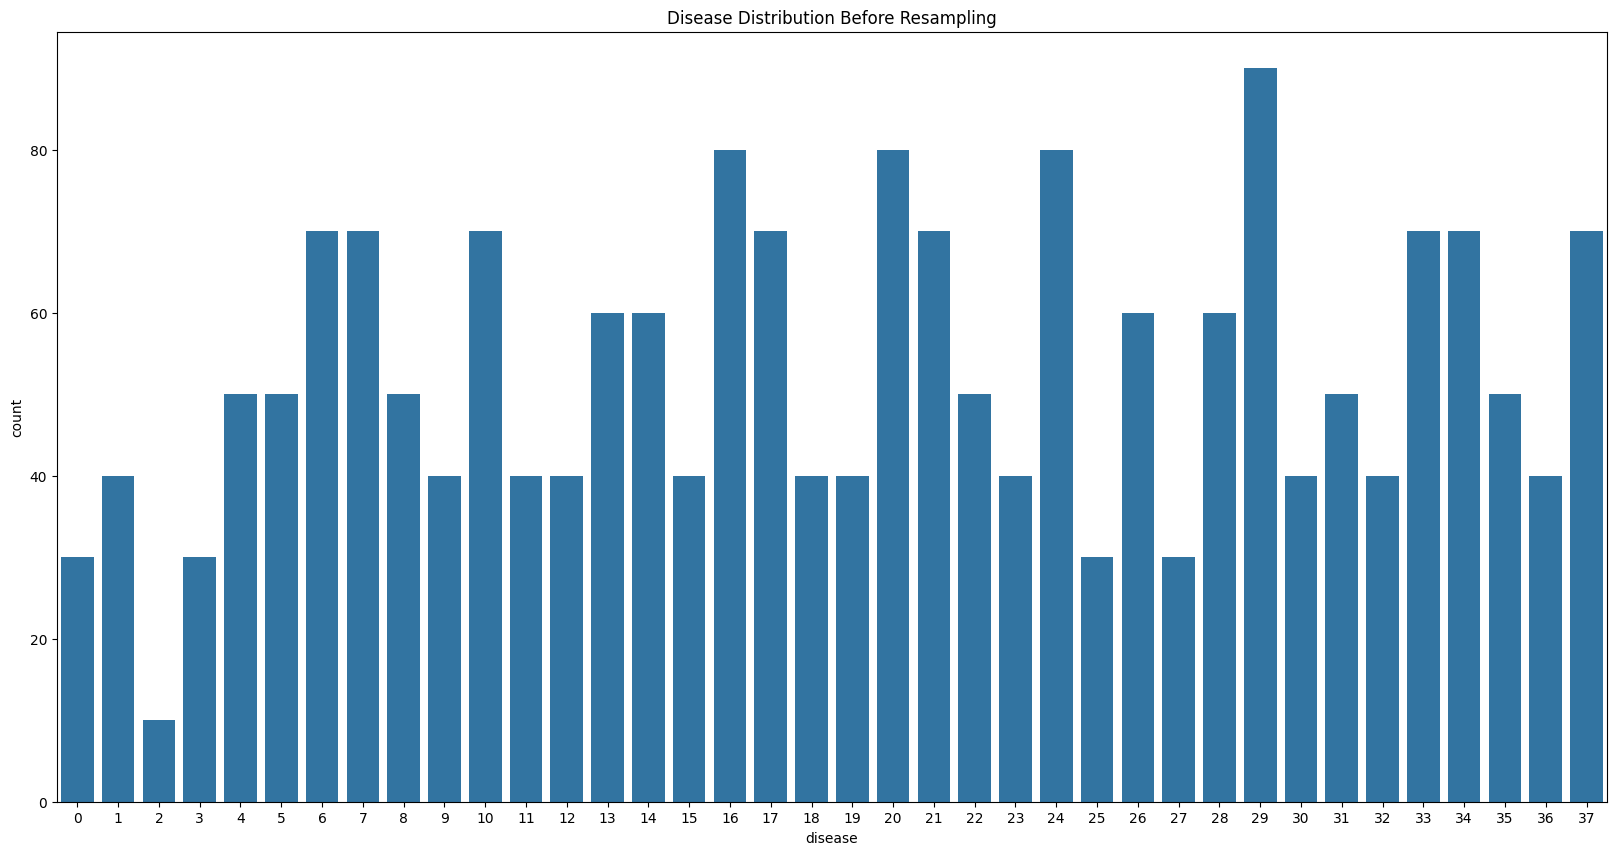

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(x=y)
plt.title('Disease Distribution Before Resampling')
plt.show()

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
ros=RandomOverSampler(random_state=42)
x_resampled, y_resampled=ros.fit_resample(x, y)
if len(y_resampled.shape) > 1:
    y_resampled = np.ravel(y_resampled)

In [16]:
y_resampled.shape

(3420,)

In [17]:
x_resampled

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
0,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,0,0,1,1,0,0
2,0,0,1,0,1,0,1,1,0,0
3,0,0,1,1,1,0,1,1,1,1
4,1,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
3415,0,0,1,1,0,0,0,0,0,1
3416,0,0,0,1,0,1,0,0,0,1
3417,0,0,0,1,0,1,0,0,0,1
3418,0,0,0,0,0,1,1,0,0,0


In [18]:
from sklearn.model_selection import StratifiedKFold

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [20]:
models={
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'SVM':SVC()
}

In [35]:
stratified_k_fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for model_name, model in models.items():
  scores=cross_val_score(model, x_resampled, y_resampled, cv=stratified_k_fold, scoring='accuracy', n_jobs=-1, error_score='raise')
  print(f'{model_name} Mean Accuracy: {scores}')
  print(f'{model_name} Mean Accuracy: {scores.mean()}')

Decision Tree Mean Accuracy: [0.5497076  0.54385965 0.53508772 0.53654971 0.52631579]
Decision Tree Mean Accuracy: 0.5383040935672515
Random Forest Mean Accuracy: [0.55409357 0.54093567 0.53947368 0.53362573 0.53508772]
Random Forest Mean Accuracy: 0.5406432748538011
SVM Mean Accuracy: [0.51315789 0.51169591 0.49707602 0.48245614 0.49561404]
SVM Mean Accuracy: 0.5


Accuracy: 60.526315789473685


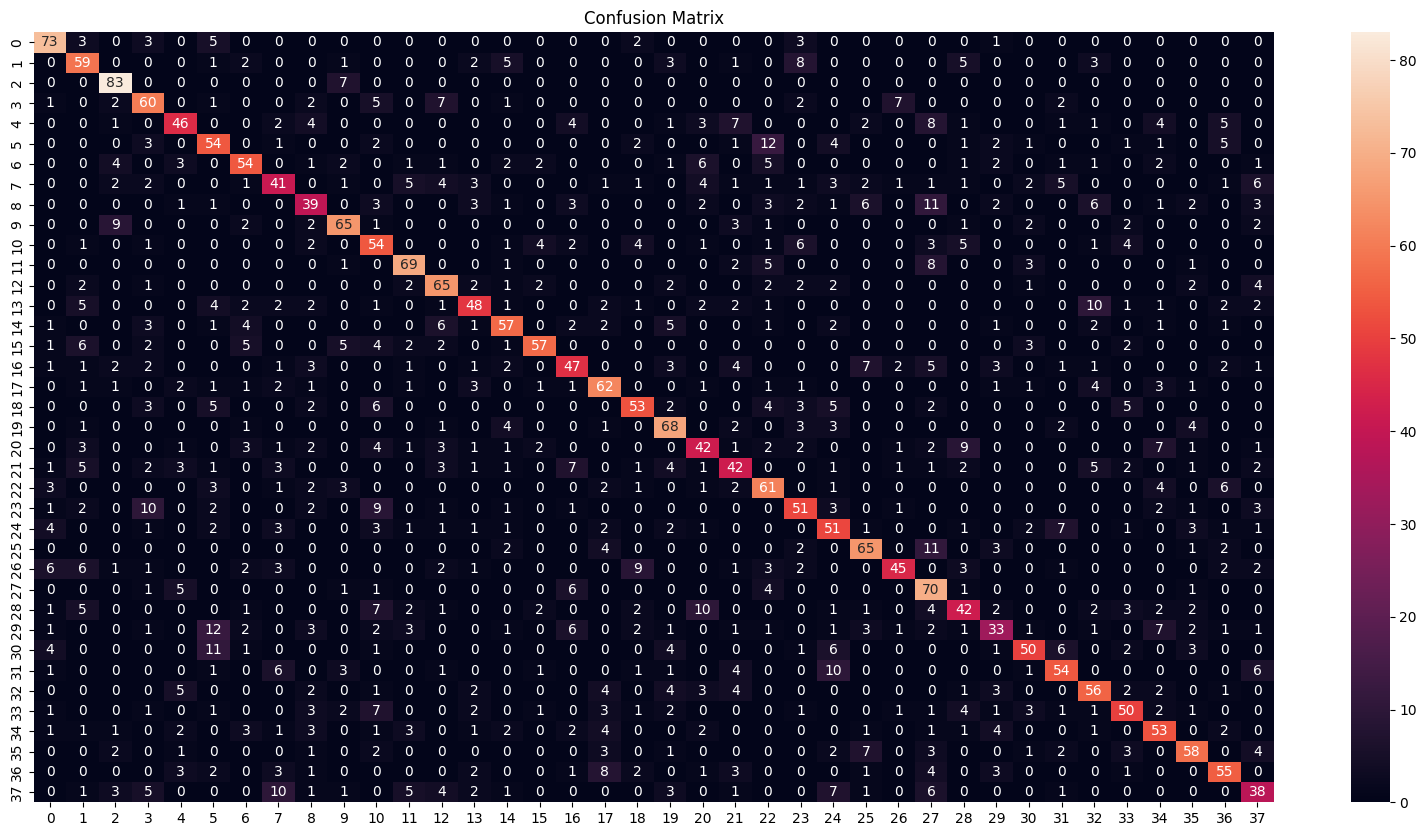

In [22]:
svm_model=SVC()
svm_model.fit(x_resampled, y_resampled)
svm_pred=svm_model.predict(x_resampled)
svm_accuracy=accuracy_score(y_resampled, svm_pred)
print(f'Accuracy: {svm_accuracy*100}')

svm_confusion_matrix=confusion_matrix(y_resampled, svm_pred)

plt.figure(figsize=(20, 10))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from sklearn.naive_bayes import GaussianNB

Accuracy: 37.98245614035088


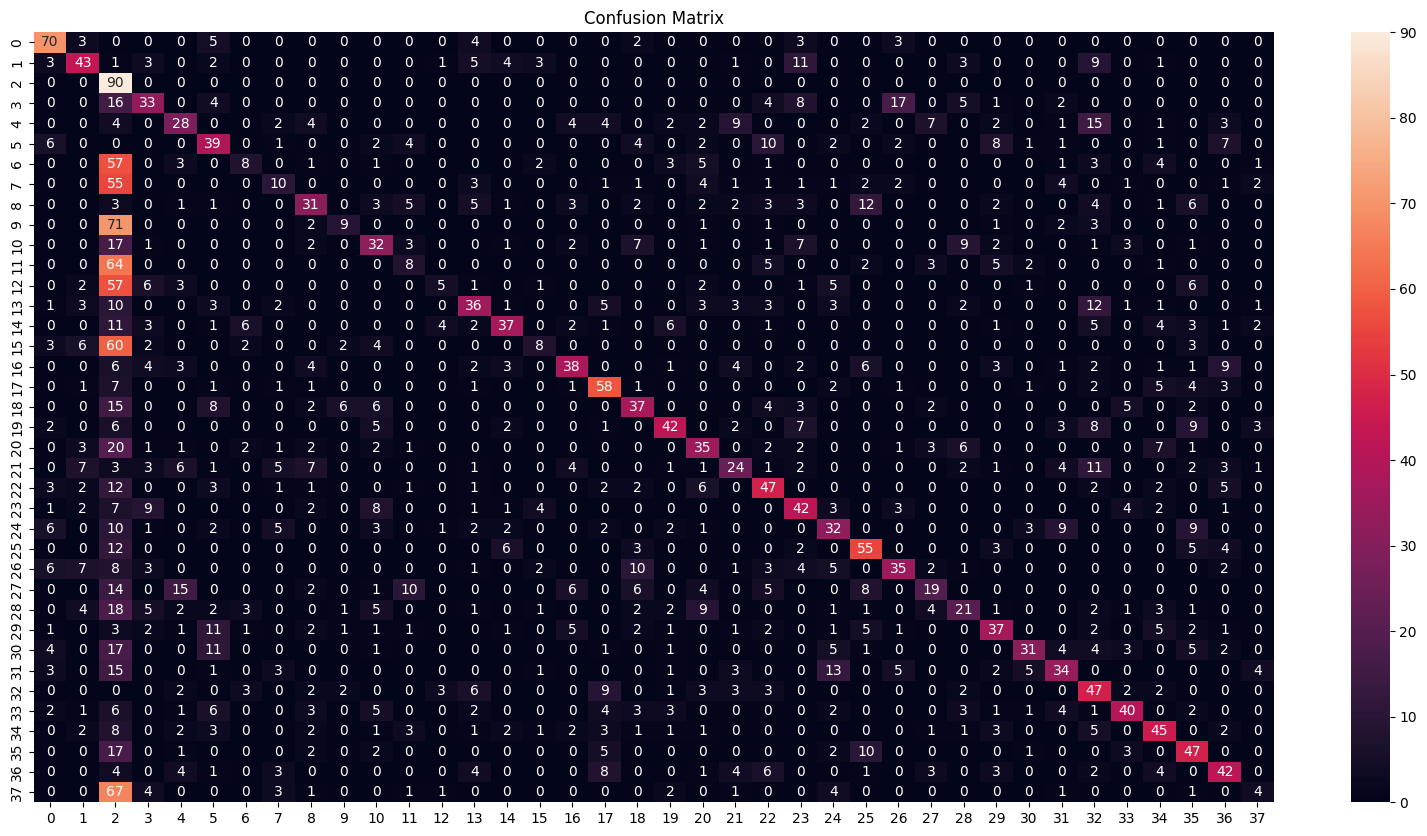

In [24]:
nb_model=GaussianNB()
nb_model.fit(x_resampled, y_resampled)
nb_model_pred=nb_model.predict(x_resampled)
nb_accuracy=accuracy_score(y_resampled, nb_model_pred)
print(f'Accuracy: {nb_accuracy*100}')

nb_model_confusion_matrix=confusion_matrix(y_resampled, nb_model_pred)

plt.figure(figsize=(20, 10))
sns.heatmap(nb_model_confusion_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 68.9766081871345


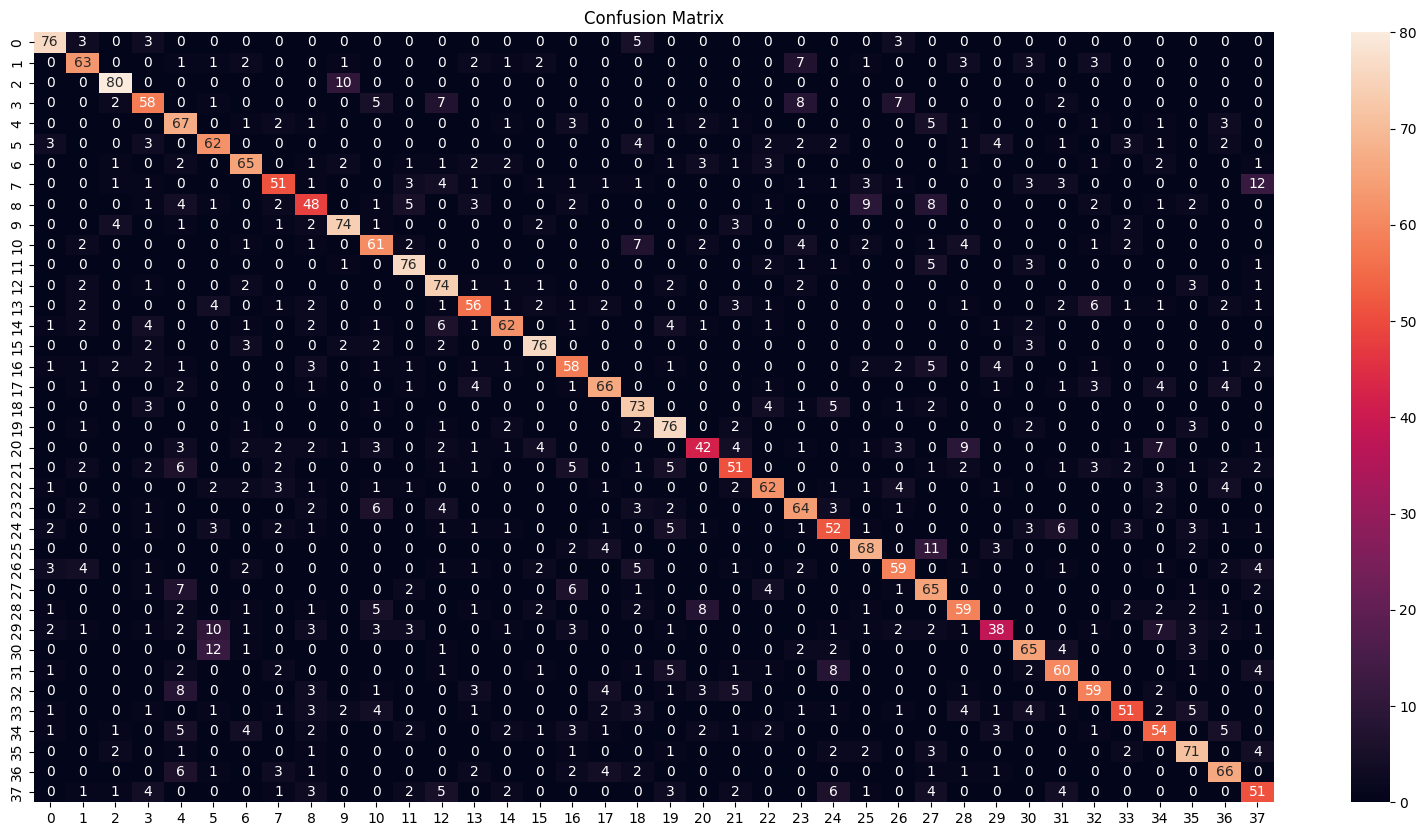

In [25]:
rfc_model=RandomForestClassifier()
rfc_model.fit(x_resampled, y_resampled)
rfc_model_pred=rfc_model.predict(x_resampled)
rfc_accuracy=accuracy_score(y_resampled, rfc_model_pred)
print(f'Accuracy: {rfc_accuracy*100}')

rfc_model_confusion_matrix=confusion_matrix(y_resampled, rfc_model_pred)

plt.figure(figsize=(20, 10))
sns.heatmap(rfc_model_confusion_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 68.9766081871345


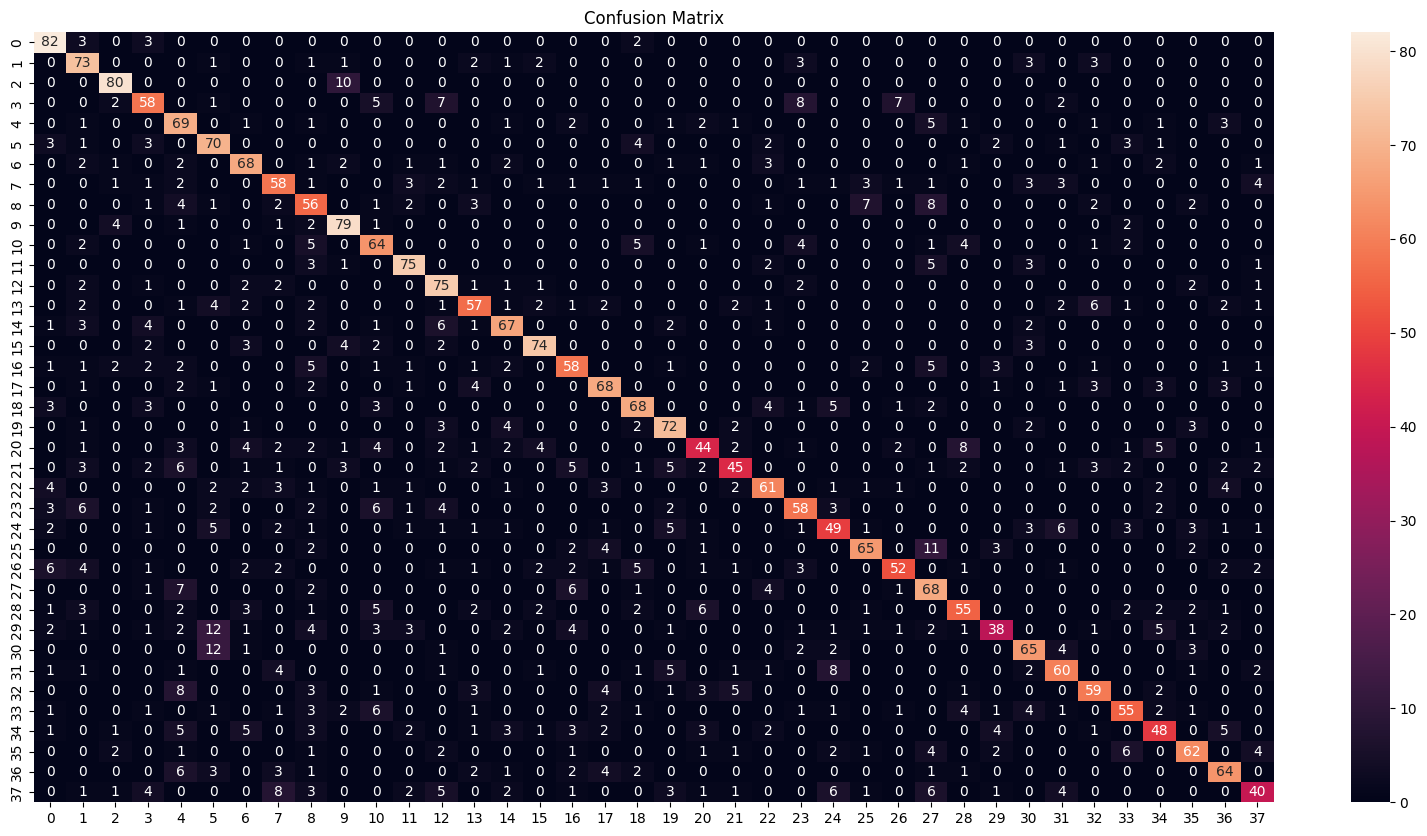

In [37]:
dtc_model=DecisionTreeClassifier()
dtc_model.fit(x_resampled, y_resampled)
dtc_model_pred=dtc_model.predict(x_resampled)
dtc_accuracy=accuracy_score(y_resampled, dtc_model_pred)
print(f'Accuracy: {dtc_accuracy*100}')

dtc_model_confusion_matrix=confusion_matrix(y_resampled, dtc_model_pred)

plt.figure(figsize=(20, 10))
sns.heatmap(dtc_model_confusion_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 60.23391812865497


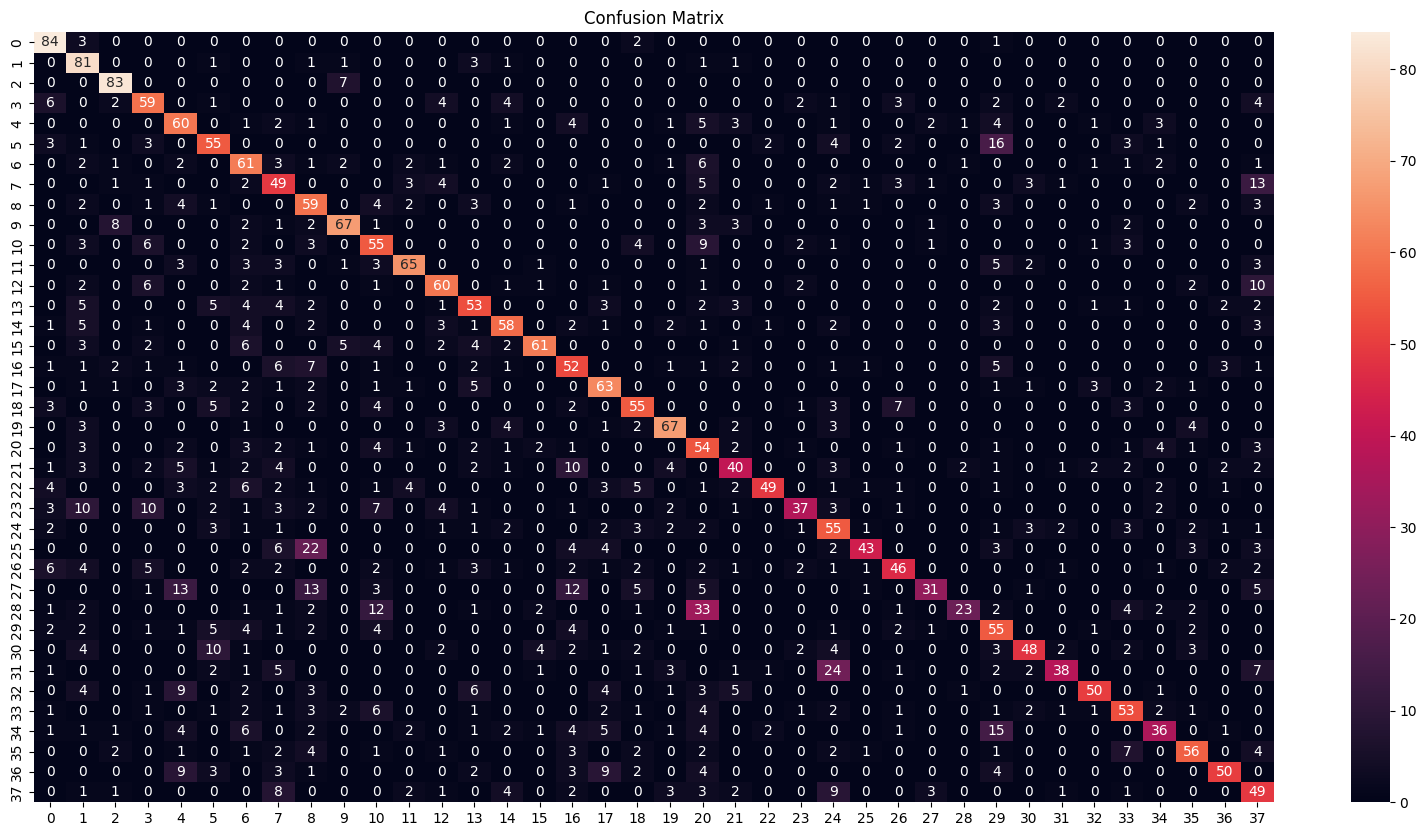

In [33]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_resampled, y_resampled)
knn_model_pred=knn_model.predict(x_resampled)
knn_accuracy=accuracy_score(y_resampled, knn_model_pred)
print(f'Accuracy: {knn_accuracy*100}')

knn_model_confusion_matrix=confusion_matrix(y_resampled, knn_model_pred)

plt.figure(figsize=(20, 10))
sns.heatmap(knn_model_confusion_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 68.9766081871345


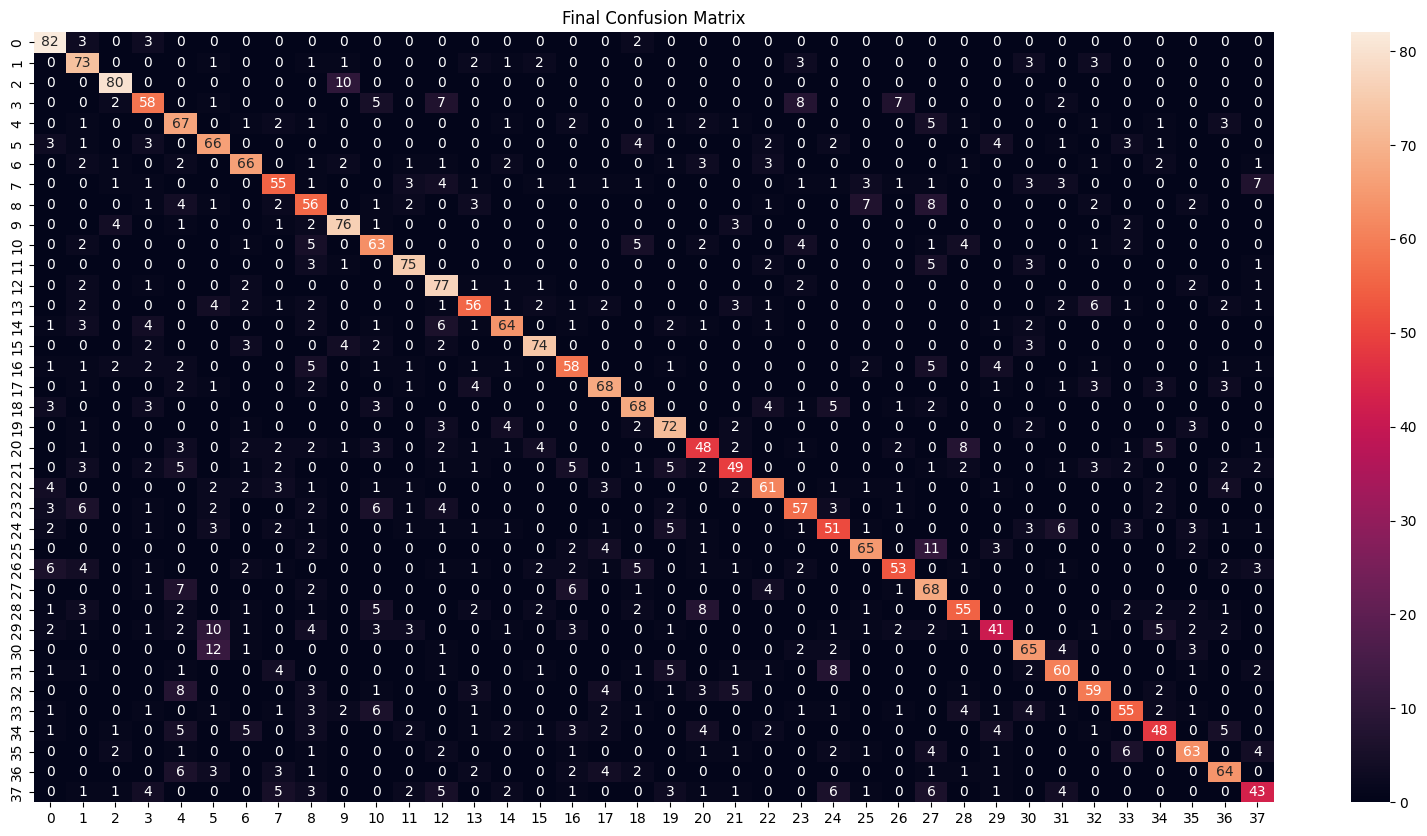

In [45]:
from statistics import mode

final_pred=[mode([i, j, k]) for i, j, k in zip(dtc_model_pred, knn_model_pred, rfc_model_pred)]

fina_accuracy=accuracy_score(y_resampled, final_pred)
print(f'Accuracy: {fina_accuracy*100}')

final_confusion_matrix=confusion_matrix(y_resampled, final_pred)

plt.figure(figsize=(20, 10))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d')
plt.title('Final Confusion Matrix')
plt.show()

In [43]:
from statistics import mode

symptoms=x.columns.values
symptom_index={symptom: idx for idx, symptom in enumerate(symptoms)}

def predict_disease(input_symptoms):
  input_symptoms = [symptom.strip() for symptom in input_symptoms.split(',')]
  input_data = pd.DataFrame(0, index=[0], columns=symptoms) # Create a DataFrame with correct columns

  for symptom in input_symptoms:
    if symptom in symptom_index:
      input_data[symptom] = 1
    else:
      print(f"Warning: Symptom '{symptom}' not found in the dataset.")

  rfc_model_pred=label_encoder.classes_[rfc_model.predict(input_data)[0]]
  knn_model_pred=label_encoder.classes_[knn_model.predict(input_data)[0]]
  dtc_model_pred=label_encoder.classes_[dtc_model.predict(input_data)[0]]


  final_pred=mode([rfc_model_pred, knn_model_pred, dtc_model_pred])


  return {
      'Random Forest Classifier':rfc_model_pred,
      'KNN Bayes':knn_model_pred,
      'Decision Tree Classifier Model':dtc_model_pred,
      'Final Result':final_pred
  }

print(predict_disease('vomiting, skin_rash, yellow_eyes'))

{'Random Forest Classifier': 'Vertigo (Benign paroxysmal Positional Vertigo)', 'KNN Bayes': 'Hypertension', 'Decision Tree Classifier Model': 'Paralysis (brain hemorrhage)', 'Final Result': 'Vertigo (Benign paroxysmal Positional Vertigo)'}
